In [1]:
from core import *
import requests, json

In [2]:
dataset_id = {
    'all': 'd_235cda81c98c02c8fe2e6d86dab461f0', 
    'first': 'd_f9cc6b55334da7fba42dc0e2a7be6aee', 
}
dataset_mode = 'all'

In [3]:
response = requests.get(
    'https://data.gov.sg/api/action/datastore_search', 
    params={
        'resource_id': dataset_id[dataset_mode],
        'limit': 999
    }
)
print(json.dumps(response.json(), indent=2))

{
  "help": "https://data.gov.sg/api/3/action/help_show?name=datastore_search",
  "success": true,
  "result": {
    "resource_id": "d_235cda81c98c02c8fe2e6d86dab461f0",
    "fields": [
      {
        "type": "text",
        "id": "DataSeries"
      },
      {
        "type": "numeric",
        "id": "2023"
      },
      {
        "type": "numeric",
        "id": "2022"
      },
      {
        "type": "numeric",
        "id": "2021"
      },
      {
        "type": "numeric",
        "id": "2020"
      },
      {
        "type": "numeric",
        "id": "2019"
      },
      {
        "type": "numeric",
        "id": "2018"
      },
      {
        "type": "numeric",
        "id": "2017"
      },
      {
        "type": "numeric",
        "id": "2016"
      },
      {
        "type": "numeric",
        "id": "2015"
      },
      {
        "type": "numeric",
        "id": "2014"
      },
      {
        "type": "numeric",
        "id": "2013"
      },
      {
        "type": "numeri

In [4]:
data = response.json()
records = data['result']['records']
df = pd.DataFrame(records)
df['DataSeries'] = df['DataSeries'].str.strip()
df['SubDataSeries'] = df['DataSeries'].where(df['DataSeries'].str.startswith('Grooms'))
df['DataSeries'] = df['DataSeries'].where(df['SubDataSeries'].isna()).ffill()
df['SubDataSeries'] = df['SubDataSeries'].fillna('Total')
df['DataSeries'] = df['DataSeries'].str.replace(r'(?i)^brides?\W*', '', regex=True).str.replace(r'[^a-zA-Z0-9&]+', ' ').str.title().str.strip()
df['SubDataSeries'] = df['SubDataSeries'].str.replace(r'(?i)^grooms?\W*', '', regex=True).str.replace(r'[^a-zA-Z0-9&]+', ' ').str.title().str.strip()
df = df.rename(columns={'DataSeries': 'brides', 'SubDataSeries': 'grooms'}).drop(columns=['_id'])
df['brides'] = pd.Categorical(df['brides'], ['Secondary & Below', 'Post-Secondary', 'University', 'Total'], ordered=True)
df['grooms'] = pd.Categorical(df['grooms'], ['Secondary & Below', 'Post-Secondary', 'University', 'Total'], ordered=True)
df['comparison'] = df['grooms'].lt(df['brides']).map({True: 'Groom < Bride', False: 'Groom = Bride'}).where(df['grooms'].le(df['brides']), 'Groom > Bride')
df['comparison'] = pd.Categorical(df['comparison'], ['Groom < Bride', 'Groom = Bride', 'Groom > Bride'], ordered=True)
df = df.set_index(keys=['brides', 'grooms', 'comparison']).rename(columns=int).astype('int').transpose().sort_index(axis=0).sort_index(axis=1).copy(deep=True)
# df = df.set_index(keys=['brides', 'grooms']).rename(columns=int).astype('int').unstack(level=0).sort_index(axis=0).sort_index(axis=1).copy(deep=True)
assert isinstance(df, pd.DataFrame)
display_all_columns(df.T)

1984   1985   1986   1987  \
brides            grooms            comparison                                  
Secondary & Below Secondary & Below Groom = Bride  14137  12887  10545  12473   
                  Post-Secondary    Groom > Bride   1966   1809   1484   1880   
                  University        Groom > Bride    561    533    407    537   
                  Total             Groom > Bride  16664  15229  12436  14890   
Post-Secondary    Secondary & Below Groom < Bride    865    832    688    902   
                  Post-Secondary    Groom = Bride   1015    946    804   1002   
                  University        Groom > Bride    468    435    413    531   
                  Total             Groom > Bride   2348   2213   1905   2435   
University        Secondary & Below Groom < Bride     72     81     85    103   
                  Post-Secondary    Groom < Bride    145    154    133    203   
                  University        Groom = Bride    743    818    816   1004   
                  Total             Groom > Bride    961   1053   1034   1310   
Total             Secondary & Below Groom < Bride  15074  13800  11318  13478   
                  Post-Secondary    Groom < Bride   3126   2909   2421   3085   
                  University        Groom < Bride   1772   1786   1636   2072   
                  Total             Groom = Bride  19973  18495  15375  18635   

                                                    1988   1989   1990   1991  \
brides            grooms            comparison                                  
Secondary & Below Secondary & Below Groom = Bride  12709  11710  11544  11393   
                  Post-Secondary    Groom > Bride   2087   1950   2109   2170   
                  University        Groom > Bride    588    569    634    657   
                  Total             Groom > Bride  15384  14229  14287  14220   
Post-Secondary    Secondary & Below Groom < Bride   1011    973   1050   1269   
                  Post-Secondary    Groom = Bride   1255   1184   1323   1628   
                  University        Groom > Bride    542    564    670    688   
                  Total             Groom > Bride   2808   2721   3043   3585   
University        Secondary & Below Groom < Bride    134    133    173    203   
                  Post-Secondary    Groom < Bride    246    264    279    323   
                  University        Groom = Bride   1210   1199   1409   1654   
                  Total             Groom > Bride   1590   1596   1861   2180   
Total             Secondary & Below Groom < Bride  13854  12816  12767  12865   
                  Post-Secondary    Groom < Bride   3588   3398   3711   4121   
                  University        Groom < Bride   2340   2332   2713   2999   
                  Total             Groom = Bride  19782  18546  19191  19985   

                                                    1992   1993   1994   1995  \
brides            grooms            comparison                                  
Secondary & Below Secondary & Below Groom = Bride  11574  10702   9903   9200   
                  Post-Secondary    Groom > Bride   2358   2273   2234   2145   
                  University        Groom > Bride    661    681    648    696   
                  Total             Groom > Bride  14593  13656  12785  12041   
Post-Secondary    Secondary & Below Groom < Bride   1386   1594   1715   1853   
                  Post-Secondary    Groom = Bride   1875   1857   1960   2164   
                  University        Groom > Bride    774    880    905   1051   
                  Total             Groom > Bride   4035   4331   4580   5068   
University        Secondary & Below Groom < Bride    209    241    300    297   
                  Post-Secondary    Groom < Bride    359    400    452    517   
                  University        Groom = Bride   1829   2064   2126   2630   
                  Total             Groom > Bride   2397   2705   2878   3444   


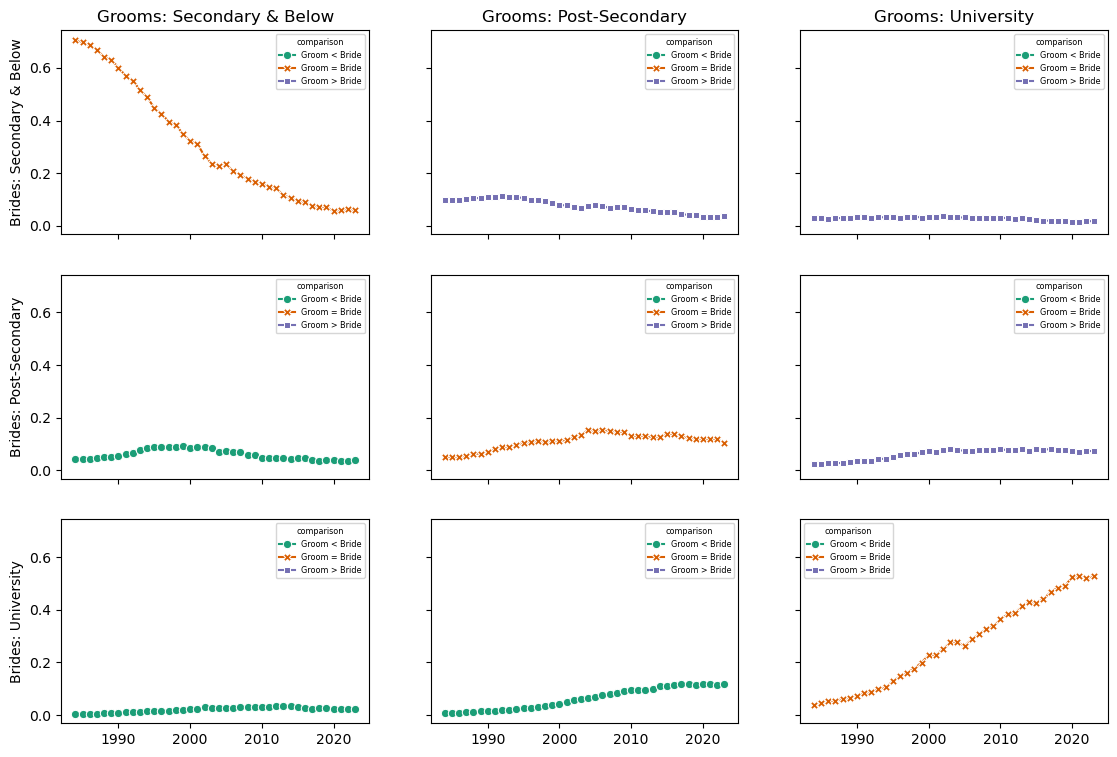

In [5]:
df_pct = df.apply(lambda row: row / row[('Total', 'Total', 'Groom = Bride')], axis=1)
_df_pct = df_pct.droplevel(level=['comparison'], axis=1).copy(deep=True)
fig, axs = plot_multicol_data(df_pct.drop(columns=['Total'], level='brides').drop(columns=['Total'], level='grooms'), x_level='brides', y_level='grooms')
plt.show()
fig.clf()
plt.close()

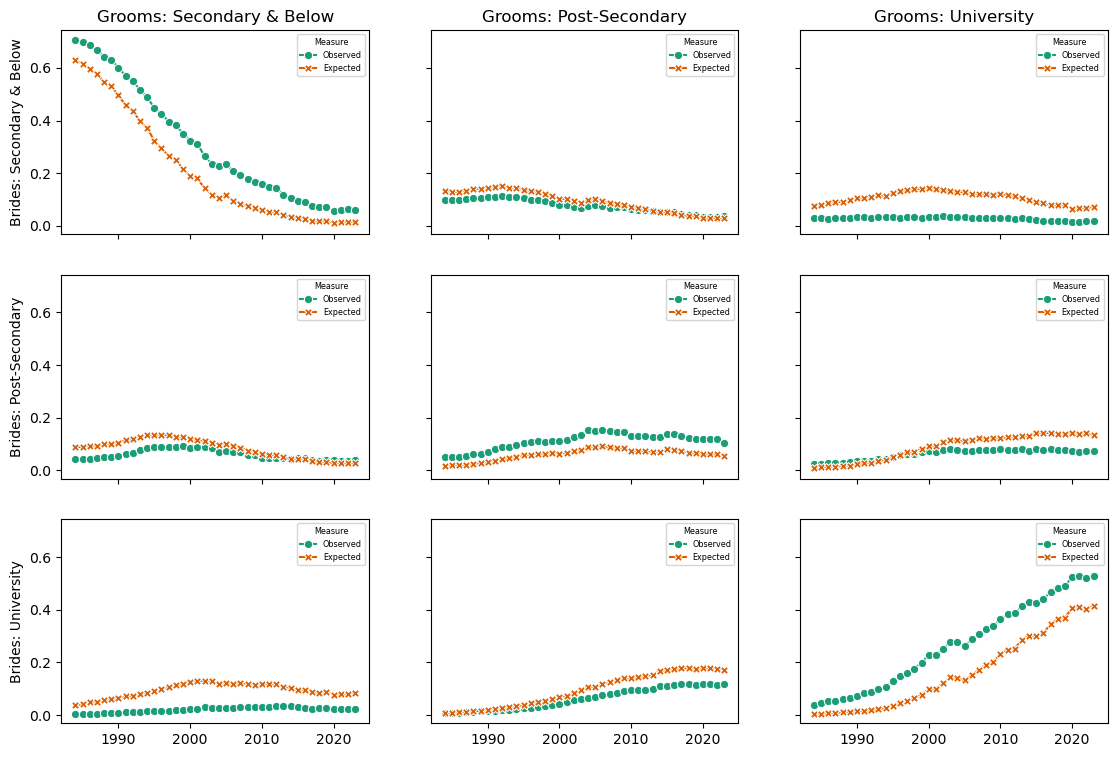

In [6]:
df_pct_margin = pd.concat({
    b_lvl: _df_pct.xs(('Total',), 1, ('brides',)).apply(lambda row: row * _df_pct.loc[row.name,(b_lvl,'Total')], axis=1)
    for b_lvl in _df_pct.columns.unique('brides')
}, axis=1, names=['brides', 'grooms'])
df_pct_margin = pd.concat({
    'Observed': _df_pct, 'Expected': df_pct_margin, 
}, axis=1, names=['Measure', 'brides', 'grooms'])
_df_pct_margin = df_pct_margin.drop(columns=['Total'], level='brides').drop(columns=['Total'], level='grooms').copy(deep=True)
fig, axs = plot_multicol_data(_df_pct_margin, x_level='brides', y_level='grooms')
fig.savefig(f'./education_{dataset_mode}.svg', transparent=False, format='svg', bbox_inches='tight')
plt.show()
fig.clf()
plt.close()

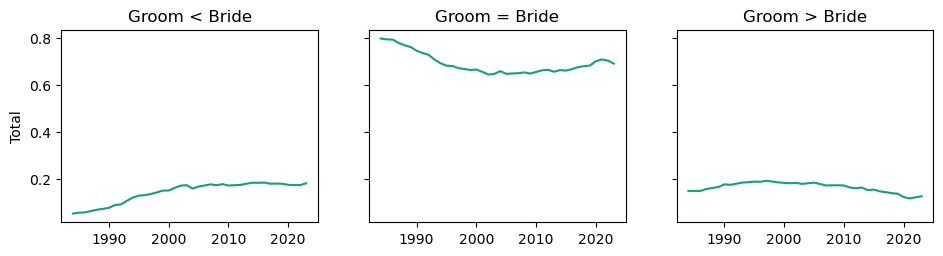

In [7]:
df_comp_pct = df_pct.drop(columns=['Total'], level='brides').drop(columns=['Total'], level='grooms').T.groupby(by=['comparison'], observed=True).sum().T.copy(deep=True)
fig, axs = plot_singlecol_data(df_comp_pct, 'Total')
plt.show()
fig.clf()
plt.close()

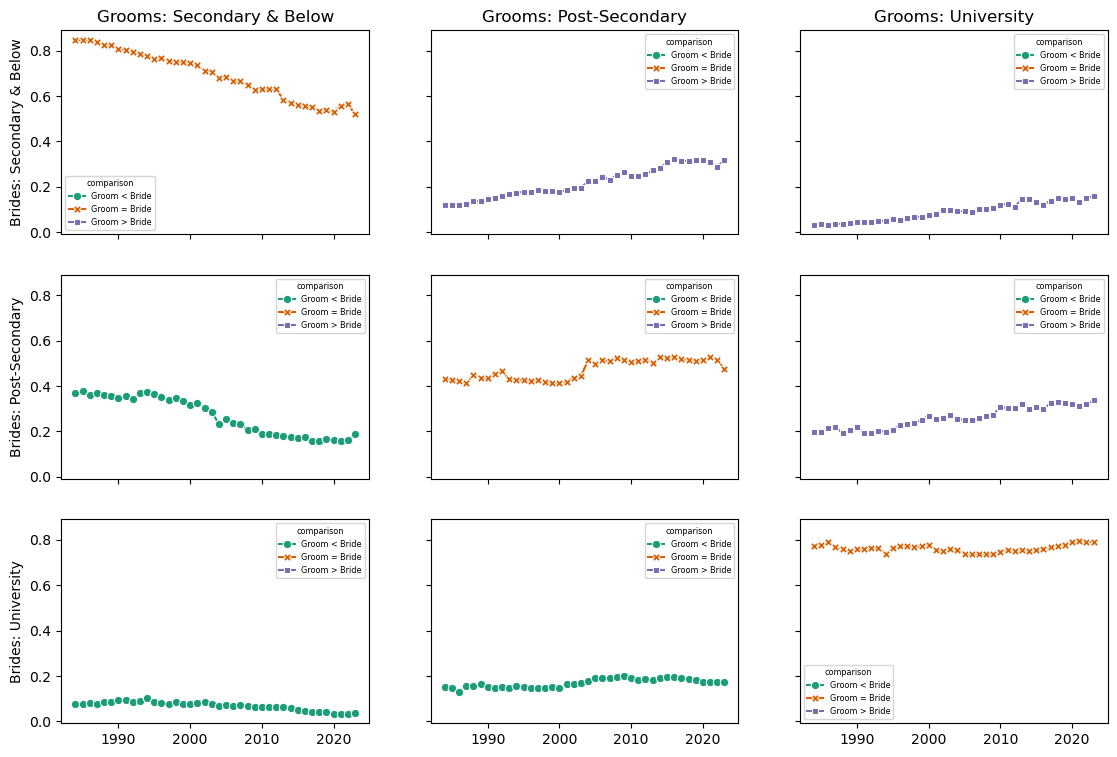

In [8]:
df_bride_pct = df_pct.div(df_pct.xs(('Total',), 1, ('grooms',)).droplevel(level=['comparison'], axis=1))#.droplevel(level=['comparison'], axis=1)
_df_bride_pct = df_bride_pct.drop(columns=['Total'], level='brides').drop(columns=['Total'], level='grooms').copy(deep=True)
fig, axs = plot_multicol_data(_df_bride_pct, x_level='brides', y_level='grooms')
plt.show()
fig.clf()
plt.close()

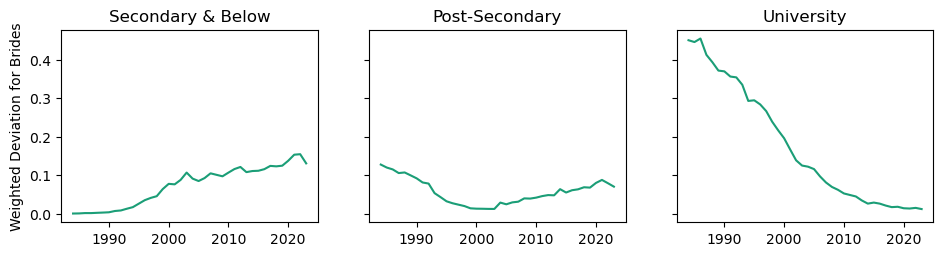

In [9]:
df_bride_pct_dev = _df_bride_pct.subtract(df_pct.droplevel(level=['comparison'], axis=1).xs(('Total',), 1, ('grooms',)).rename_axis(columns=['grooms'])).pow(2)
df_bride_pct_dev = df_bride_pct_dev.mul(_df_bride_pct)
df_bride_pct_dev = df_bride_pct_dev.T.groupby(by=['brides'], observed=True).sum().div(_df_bride_pct.T.groupby(by=['brides'], observed=True).sum()).T
fig, axs = plot_singlecol_data(df_bride_pct_dev, 'Weighted Deviation for Brides')
plt.show()
fig.clf()
plt.close()

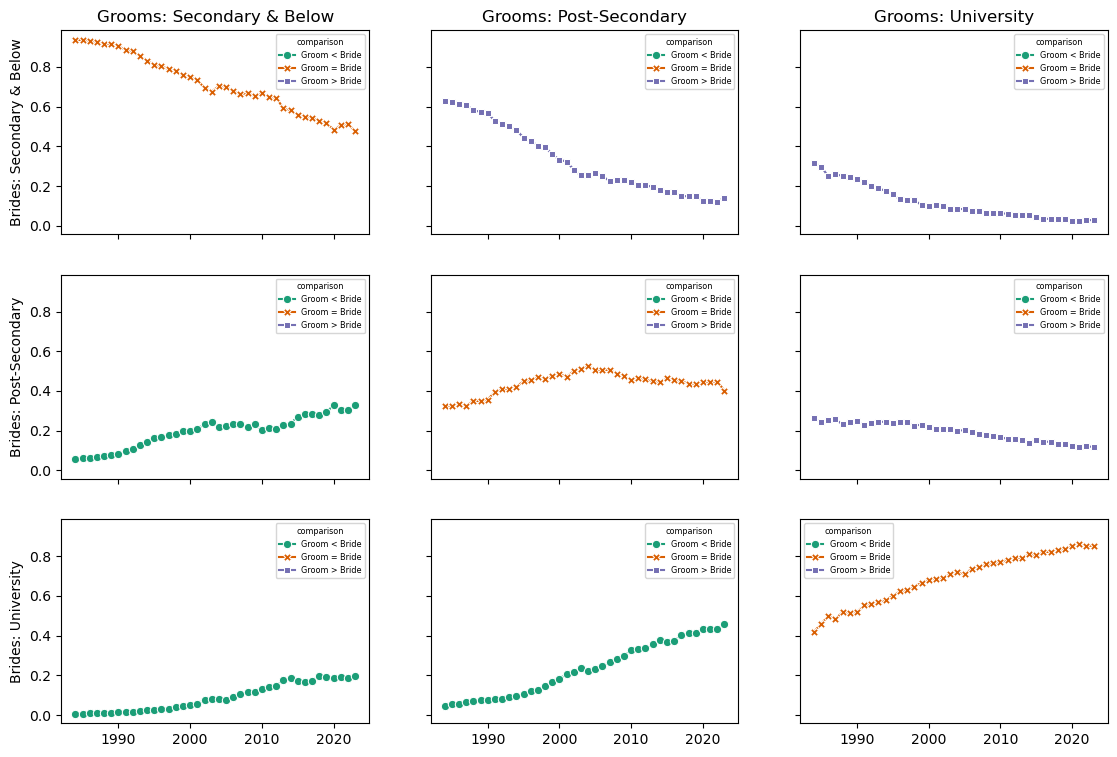

In [10]:
df_groom_pct = df_pct.div(df_pct.xs(('Total',), 1, ('brides',)).droplevel(level=['comparison'], axis=1))#.droplevel(level=['comparison'], axis=1)
_df_groom_pct = df_groom_pct.drop(columns=['Total'], level='brides').drop(columns=['Total'], level='grooms').copy(deep=True)
fig, axs = plot_multicol_data(_df_groom_pct, x_level='brides', y_level='grooms')
plt.show()
fig.clf()
plt.close()

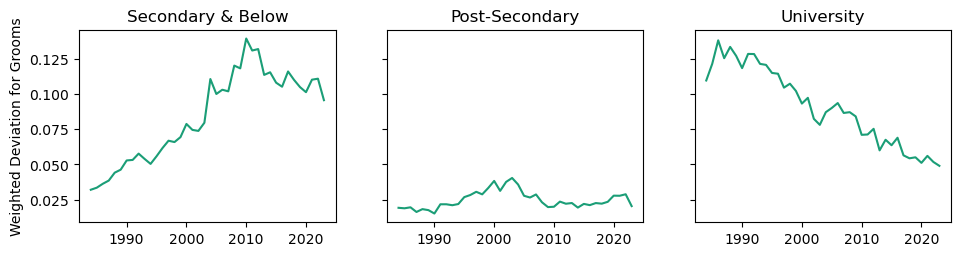

In [11]:
df_groom_pct_dev = _df_groom_pct.subtract(df_pct.droplevel(level=['comparison'], axis=1).xs(('Total',), 1, ('brides',)).rename_axis(columns=['brides'])).pow(2)
df_groom_pct_dev = df_groom_pct_dev.mul(_df_groom_pct)
df_groom_pct_dev = df_groom_pct_dev.T.groupby(by=['grooms'], observed=True).sum().div(_df_groom_pct.T.groupby(by=['grooms'], observed=True).sum()).T
fig, axs = plot_singlecol_data(df_groom_pct_dev, 'Weighted Deviation for Grooms')
plt.show()
fig.clf()
plt.close()